In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

/workspaces/ml_1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0k/22.0k [00:00<00:00, 2.61MB/s]

Extracting files...
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Titanic-Dataset.csv')

In [7]:
df.shape

(891, 12)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,G6,S
freq,1,577,7,4,644


<Axes: >

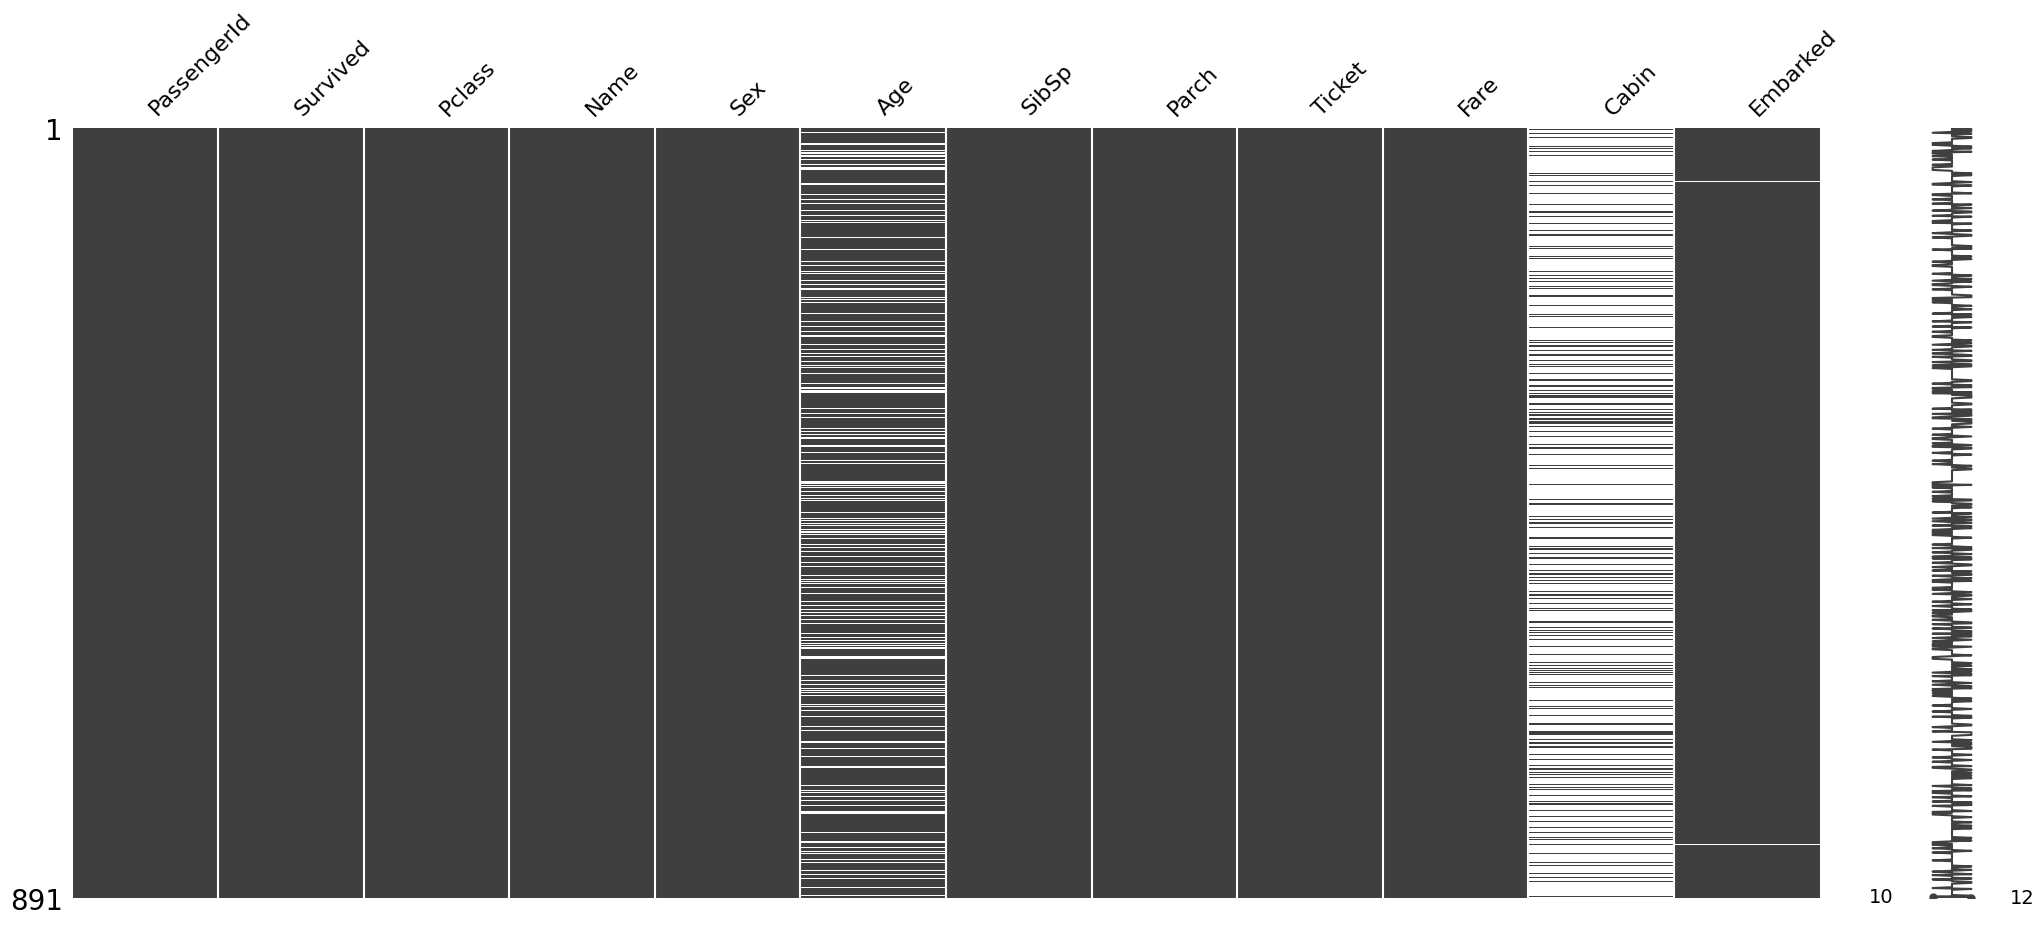

In [14]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

<Axes: >

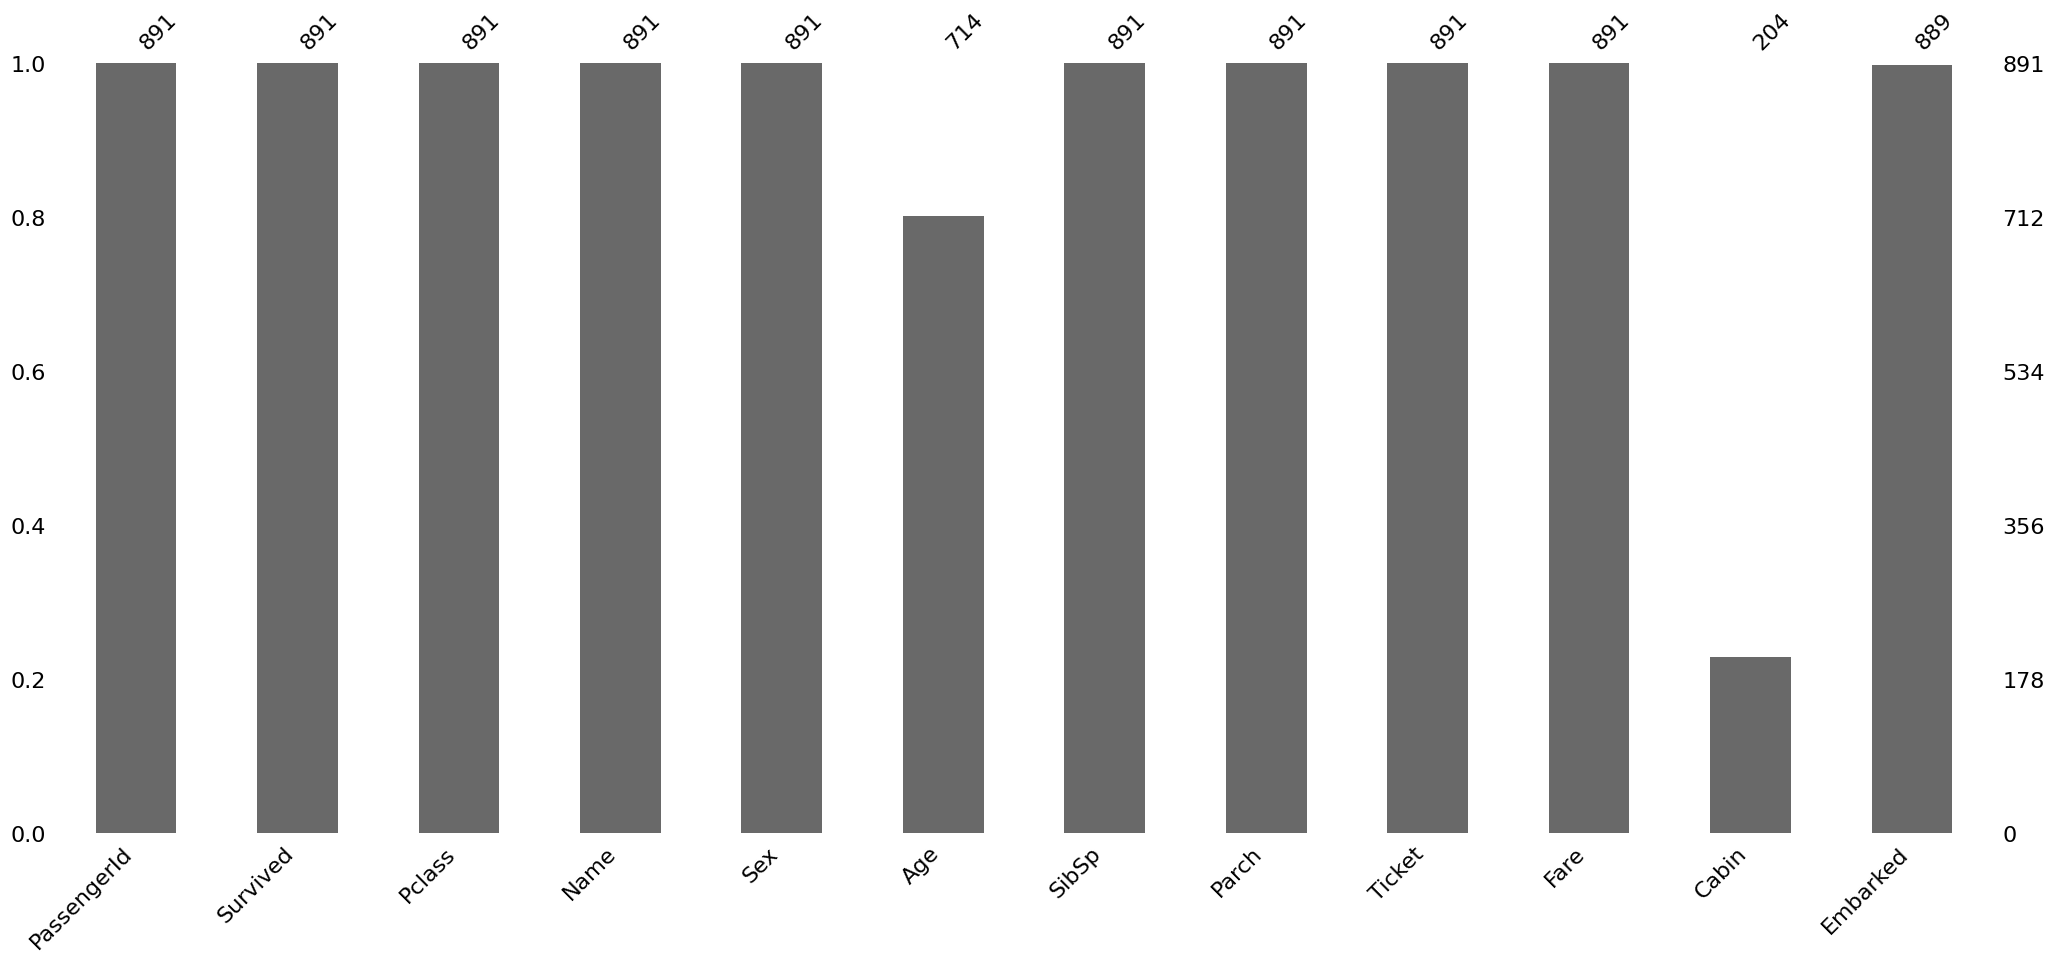

In [15]:
msno.bar(df)

<Axes: >

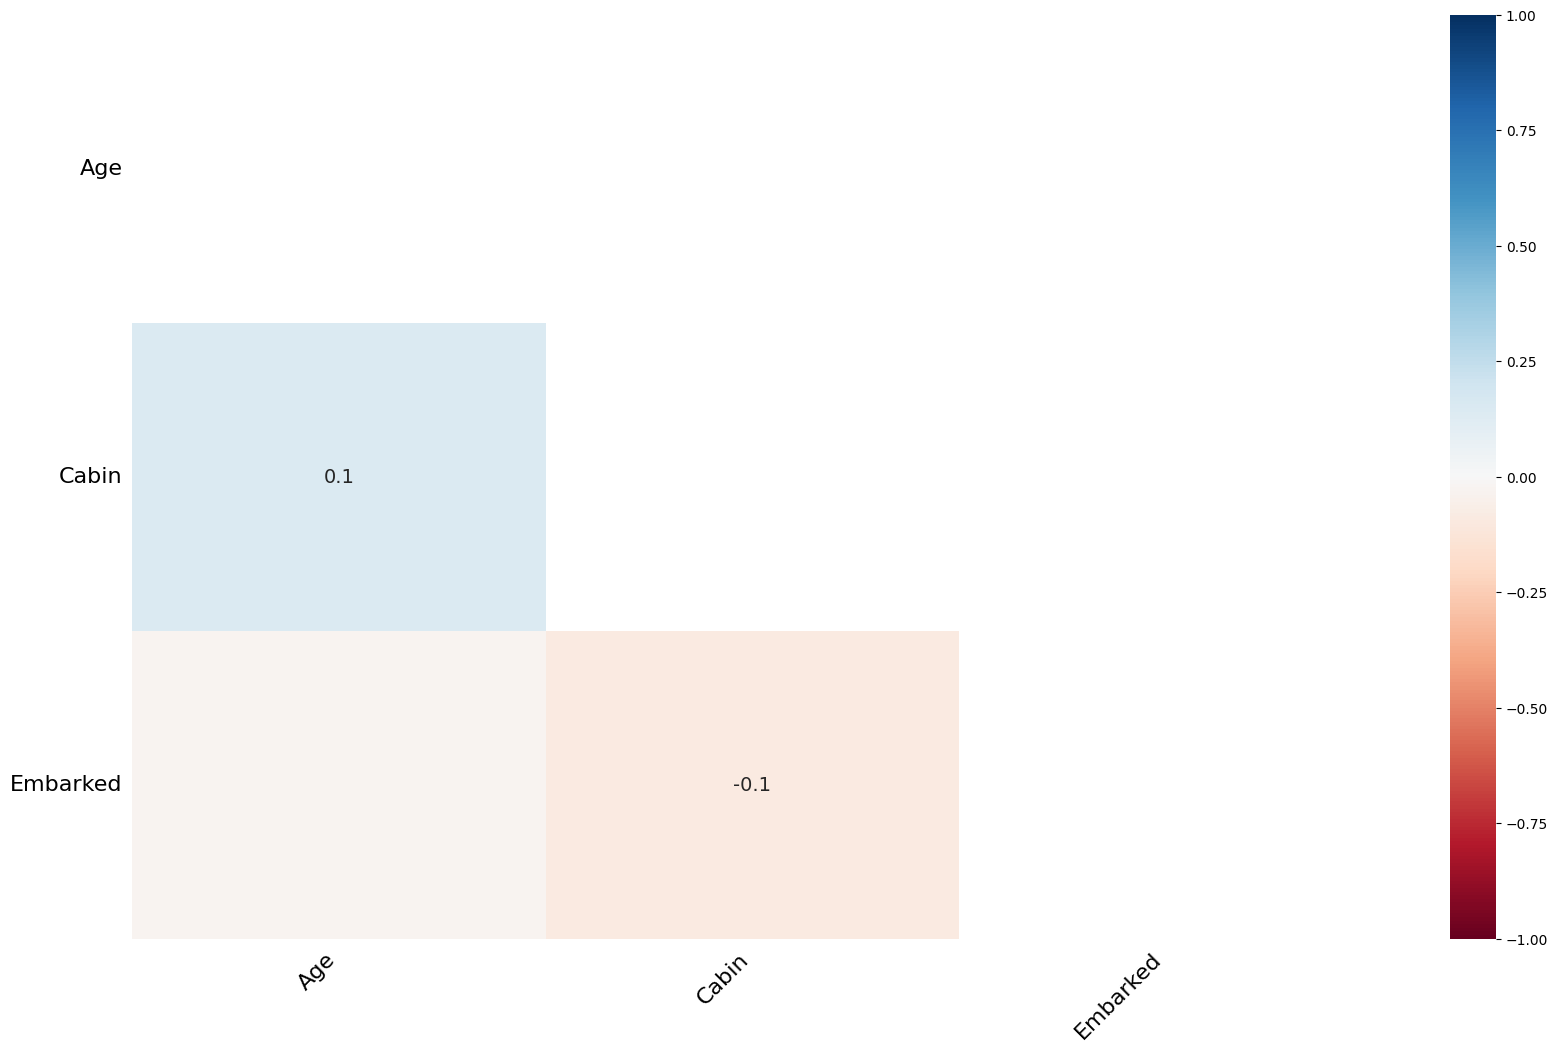

In [16]:
msno.heatmap(df)

In [18]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
df['Name'].dtype

dtype('O')

In [30]:
not(df['Name'].dtype=='O')

False

In [33]:
df.select_dtypes('integer')

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [39]:
for col in df.columns:
    if col not in ['Pclass','PassengerId','Name']:
        if  not(df[col].dtype=='O'):
            print('Survived rate for: ',col)
            print(df[['Pclass',col]].groupby('Pclass',as_index=False).mean())

Survived rate for:  Survived
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Survived rate for:  Age
   Pclass        Age
0       1  38.233441
1       2  29.877630
2       3  25.140620
Survived rate for:  SibSp
   Pclass     SibSp
0       1  0.416667
1       2  0.402174
2       3  0.615071
Survived rate for:  Parch
   Pclass     Parch
0       1  0.356481
1       2  0.380435
2       3  0.393075
Survived rate for:  Fare
   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


In [40]:
print('Survived rate for: ','Sex')
print(df[['Survived','Sex']].groupby('Sex',as_index=False).mean())

Survived rate for:  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908


In [41]:
print('Survived rate for: ','Ticket')
print(df[['Survived','Ticket']].groupby('Ticket',as_index=False).mean())

Survived rate for:  Ticket
          Ticket  Survived
0         110152  1.000000
1         110413  0.666667
2         110465  0.000000
3         110564  1.000000
4         110813  1.000000
..           ...       ...
676   W./C. 6608  0.000000
677   W./C. 6609  0.000000
678  W.E.P. 5734  0.000000
679    W/C 14208  0.000000
680    WE/P 5735  0.500000

[681 rows x 2 columns]


In [44]:
df_dropped =df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)

In [45]:
df_dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [46]:
print('Survived rate for: ','Embarked')
print(df[['Survived','Embarked']].groupby('Embarked',as_index=False).mean())

Survived rate for:  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [47]:
df_dropped['Embarked'] = df_dropped['Embarked'].map({'C':0,'Q':1,'S':2})

In [48]:
df_dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2.0
1,1,1,female,38.0,1,0,71.2833,0.0
2,1,3,female,26.0,0,0,7.9250,2.0
3,1,1,female,35.0,1,0,53.1000,2.0
4,0,3,male,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,2.0
887,1,1,female,19.0,0,0,30.0000,2.0
888,0,3,female,NaN,1,2,23.4500,2.0
889,1,1,male,26.0,0,0,30.0000,0.0


In [49]:
df_dropped['Sex'] = df_dropped['Sex'].map({'female':0,'male':1})

In [50]:
df_dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2.0
887,1,1,0,19.0,0,0,30.0000,2.0
888,0,3,0,NaN,1,2,23.4500,2.0
889,1,1,1,26.0,0,0,30.0000,0.0


In [51]:
df_dropped.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [59]:
df_dropped['Age'].fillna(df_dropped['Age'].mean(),inplace=True)

/tmp/ipykernel_12577/3706612457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['Age'].fillna(df_dropped['Age'].mean(),inplace=True)


In [60]:
df_dropped.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [61]:
df_dropped.dropna(inplace=True)

In [62]:
df_dropped.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [64]:
df_dropped.shape

(889, 8)

In [65]:
from sklearn.model_selection import train_test_split

In [69]:
X = df_dropped[[col for col in df_dropped.columns if col!='Survived']]

In [70]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2.0
1,1,0,38.000000,1,0,71.2833,0.0
2,3,0,26.000000,0,0,7.9250,2.0
3,1,0,35.000000,1,0,53.1000,2.0
4,3,1,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2.0
887,1,0,19.000000,0,0,30.0000,2.0
888,3,0,29.699118,1,2,23.4500,2.0
889,1,1,26.000000,0,0,30.0000,0.0


In [71]:
y = df_dropped['Survived']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred = model_1.predict(X_test)

In [77]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [78]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64

In [79]:
model_1.score(X_train, y_train)

0.8002812939521801

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test, y_pred)

0.7808988764044944